In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob
import corner, emcee, tqdm
from tweezepy import AV, PSD, MLE

In [2]:
folderPath = 'C:\\Users\\Perkins Lab\\Desktop\\Caleb Maddry\\Data\\2024\\April\\13\\400fps\\Data\\DataTSV'

fileList = glob.glob(folderPath + '/*.txt')
concatDF = pd.DataFrame(pd.read_table(fileList[0],names=['inf','zMotor', 'rotmotor', 'xRefBead1', 'yRefBead1', 'zRefBead1', 'xRefBead2','yRefBead2','zRefBead2','xExpBead1','yExpBead1','zExpBead1','xExpBead2','yExpBead2','zExpBead2' ]), columns=['inf','zMotor', 'rotmotor', 'xRefBead1', 'yRefBead1', 'zRefBead1', 'xRefBead2','yRefBead2','zRefBead2','xExpBead1','yExpBead1','zExpBead1','xExpBead2','yExpBead2','zExpBead2'])

for i  in range(1, len(fileList)):
    data = pd.read_table(fileList[i],names=['inf','zMotor', 'rotmotor', 'xRefBead1', 'yRefBead1', 'zRefBead1', 'xRefBead2','yRefBead2','zRefBead2','xExpBead1','yExpBead1','zExpBead1','xExpBead2','yExpBead2','zExpBead2' ])
    df = pd.DataFrame(data, columns=['inf','zMotor', 'rotmotor', 'xRefBead1', 'yRefBead1', 'zRefBead1', 'xRefBead2','yRefBead2','zRefBead2','xExpBead1','yExpBead1','zExpBead1','xExpBead2','yExpBead2','zExpBead2' ])
    concatDF = pd.concat([concatDF, df], ignore_index='inner')

In [3]:
xConv = 64.6
yConv = 64.7
zMotor = concatDF['zMotor']

xRefBead1 = concatDF['xRefBead1']*xConv
yRefBead1 = concatDF['yRefBead1']*yConv
zRefBead1 = concatDF['zRefBead1']*1000

xRefBead2 = concatDF['xRefBead2']*xConv
yRefBead2 = concatDF['yRefBead2']*yConv
zRefBead2 = concatDF['zRefBead2']*1000

xExpBead1 = concatDF['xExpBead1']*xConv
yExpBead1 = concatDF['yExpBead1']*yConv
zExpBead1 = concatDF['zExpBead1']*1000

xExpBead2 = concatDF['xExpBead2']*xConv
yExpBead2 = concatDF['yExpBead2']*yConv
zExpBead2 = concatDF['zExpBead2']*1000


timeVector = pd.Series(range(len(zExpBead1)))/400

## Good beads
beadX = xRefBead1 - xRefBead2
beadY = yRefBead1 - yRefBead2
beadZ = zRefBead1- zRefBead2

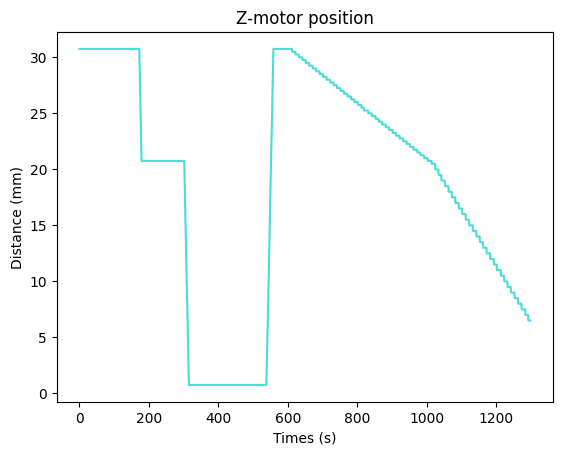

In [4]:
fig = plt.plot(timeVector, zMotor, color = '#4DDDD6')
plt.xlabel('Times (s)')
plt.ylabel('Distance (mm)')
plt.title('Z-motor position')

# Used the commented out zMotor plot to figure these below:
lowForceStart = 128000
lowForceEnd = 210000

highForceStart = 0
highForceEnd = 60000

medForceStart = 72500
medForceEnd = 120000

forceExtStart = 235000
forceExtEnd = len(zMotor)

forceExtTimeVector = pd.Series(range(forceExtEnd - forceExtStart))/400

The high force x-variance is:  643.5295808354837
The high force y-variance is:  687.8321726518046
The high force z-variance is:  51.429657606839825


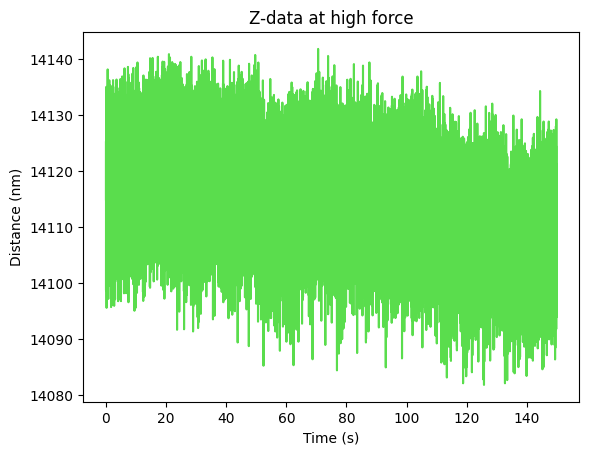

In [5]:
## High force
fig1 = plt.plot(timeVector[highForceStart:highForceEnd],zRefBead2[highForceStart:highForceEnd], color='#5ADD4D') 
plt.title('Z-data at high force')
plt.xlabel('Time (s)')
plt.ylabel('Distance (nm)')

# the x axis has the lower variance so it is most likely the 

print('The high force x-variance is: ', np.var(beadX[highForceStart:highForceEnd]))
print('The high force y-variance is: ', np.var(beadY[highForceStart:highForceEnd]))
print('The high force z-variance is: ', np.var(beadZ[highForceStart:highForceEnd]))

The low force x-variance is:  10029.890413288093
The low force y-variance is:  14124.890545834733
The low force z-variance is:  4474.296330460977


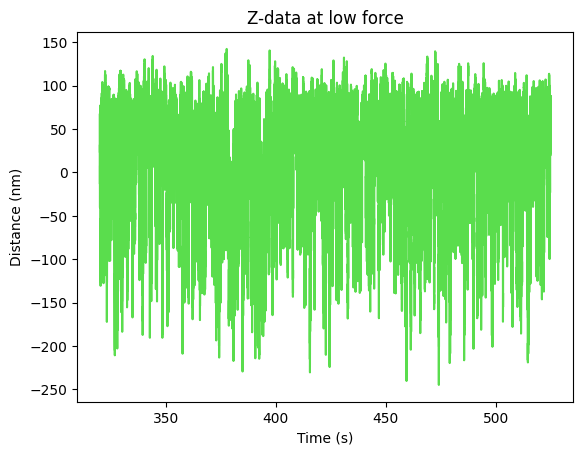

In [6]:
## Low force
fig =  plt.plot(timeVector[lowForceStart:lowForceEnd],beadZ[lowForceStart:lowForceEnd], color = '#5ADD4D')
plt.title('Z-data at low force')
plt.xlabel('Time (s)')
plt.ylabel('Distance (nm)')

print('The low force x-variance is: ', np.var(beadX[lowForceStart:lowForceEnd]))
print('The low force y-variance is: ', np.var(beadY[lowForceStart:lowForceEnd]))
print('The low force z-variance is: ', np.var(beadZ[lowForceStart:lowForceEnd]))

The glass position is:  -229.5780000000005


Text(0.5, 0.01, 'Distance (nm)')

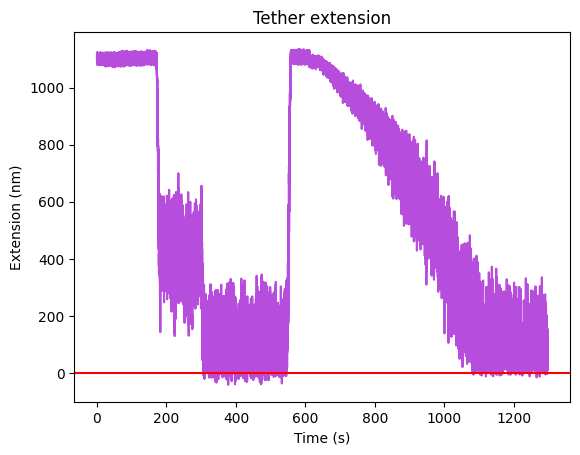

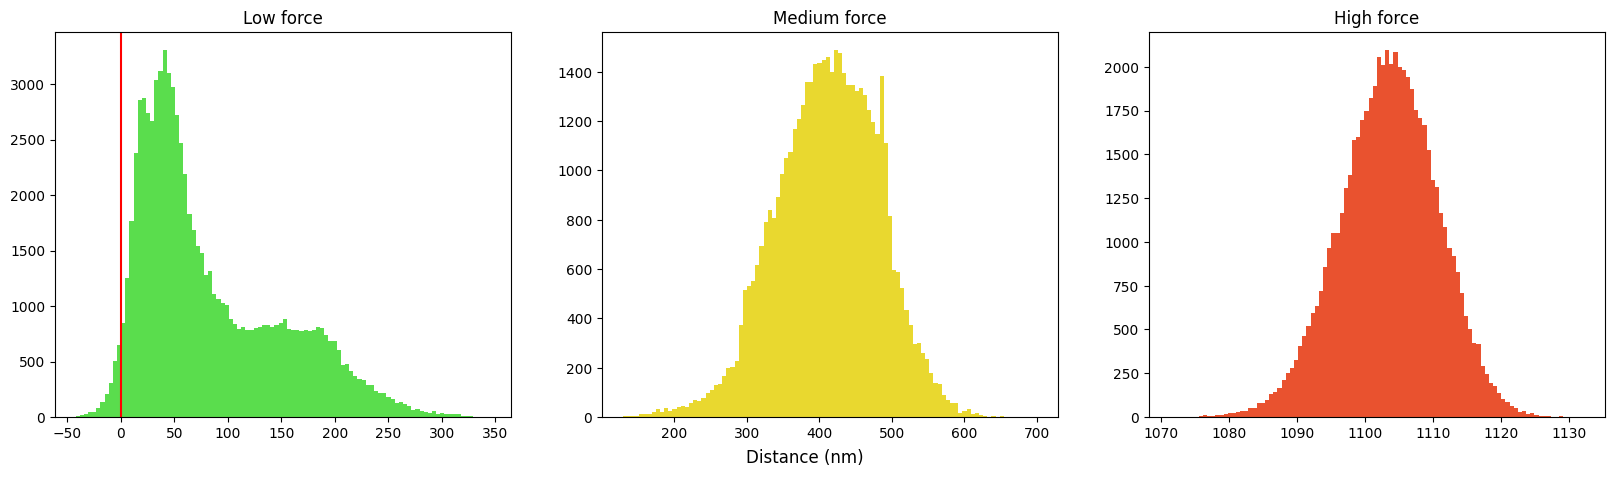

In [7]:
# Now we try and fiund the glass position
beadDiameter = 2800

# plt.figure(1)
# fig = plt.hist(-beadZ[lowForceStart:lowForceEnd], bins = 100, color='#5ADD4D')
# plt.title('Z-data at low force')
# plt.ylabel('Count')
# plt.xlabel('Distance (nm)')

sortedZdata = np.sort(beadZ[lowForceStart:lowForceEnd])

glassPosition = np.mean(sortedZdata[0:30])
print('The glass position is: ', glassPosition)

tetherExtension = -beadZ + glassPosition/2 + 215

# plt.figure(2)
# fig = plt.hist(tetherExtension[lowForceStart:lowForceEnd], bins = 100, color='#5ADD4D')
# plt.title('Tether extension at low force')
# plt.ylabel('Count')
# plt.xlabel('Distance (nm)')

# plt.figure(3)
# fig = plt.hist(tetherExtension[medForceStart:medForceEnd], bins = 100, color='#E9D82F')
# plt.title('Tether extension at medium force')
# plt.ylabel('Count')
# plt.xlabel('Distance (nm)')

# plt.figure(4)
# fig = plt.hist(tetherExtension[highForceStart:highForceEnd], bins = 100, color='#E9522F')
# plt.title('Tether extension at high force')
# plt.ylabel('Count')
# plt.xlabel('Distance (nm)')

plt.figure(5)
fig = plt.plot(timeVector, tetherExtension, color = '#B74DDD')
plt.title('Tether extension')
plt.ylabel('Extension (nm)')
plt.xlabel('Time (s)')
plt.axhline(y = 0, color = 'red')


fig, ax = plt.subplots(1, 3, figsize = (20,5))
ax[0].hist(tetherExtension[lowForceStart:lowForceEnd], bins = 100, color='#5ADD4D')
ax[1].hist(tetherExtension[medForceStart:medForceEnd], bins = 100, color='#E9D82F')
ax[2].hist(tetherExtension[highForceStart:highForceEnd], bins = 100, color='#E9522F')
ax[0].set_title('Low force')
ax[1].set_title('Medium force')
ax[2].set_title('High force')
ax[0].axvline(x = 0, color = 'red')
fig.supxlabel('Distance (nm)')

High force using AV:  6.27904047733305
High force using PSD:  5.929117566087912
High force using F = KbT*L/<x>:  7.00523932652711
Medium force using AV:  0.24399737492253962
Medium force using PSD:  0.20438115333383586
Medium force using F = KbT*L/<x>:  2.617225981951214
Low force using AV:  0.041882624750796515
Low force using PSD:  0.032476337732782114
Low force using F = KbT*L/<x>:  0.5300658098069279


Text(0.5, 1.0, 'Low Force')

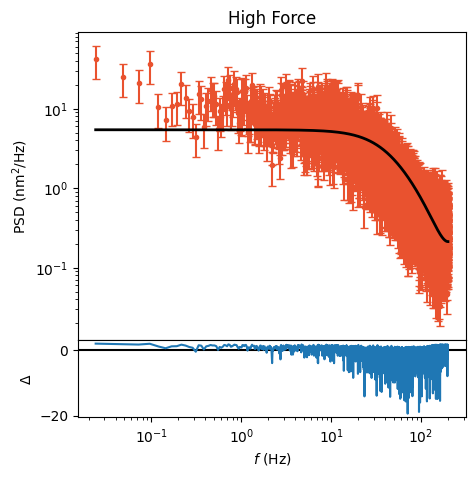

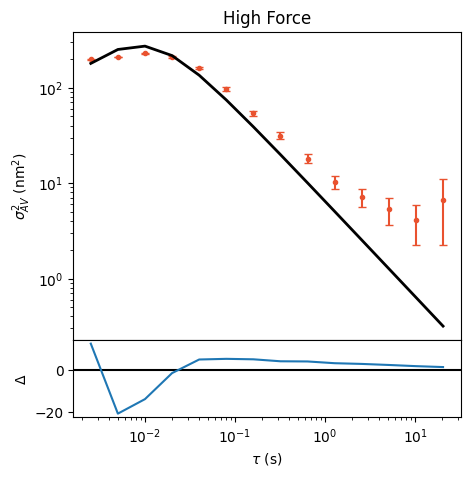

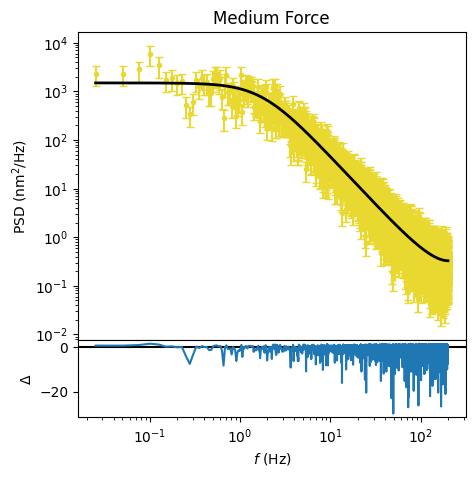

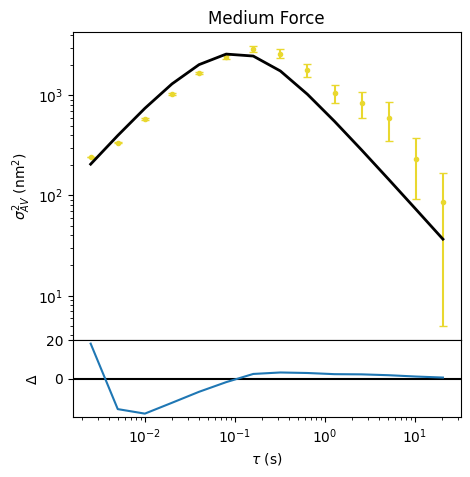

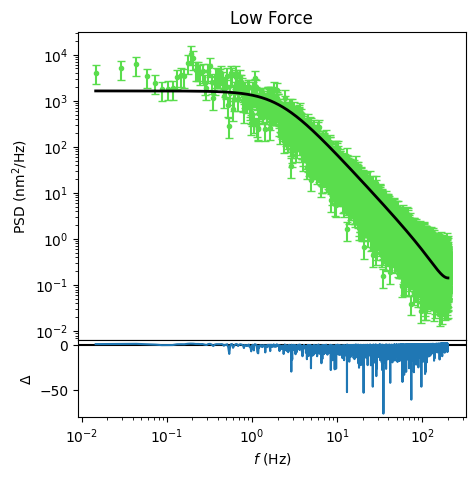

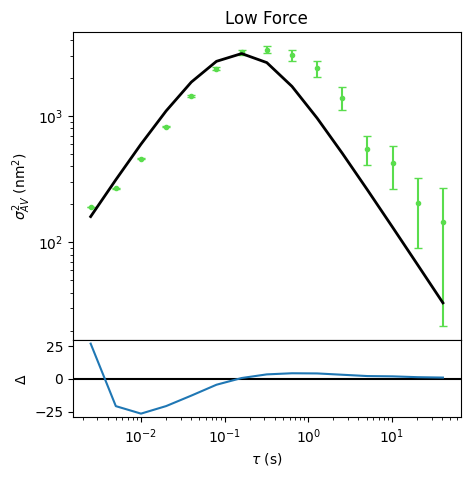

In [8]:
samplingFrequency = 400

### High Force
# Running a fit using PSD and AV
psd = PSD(beadX[highForceStart:highForceEnd-10000], samplingFrequency, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[highForceStart:highForceEnd-10000], samplingFrequency)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)

# Calculation and printing of the force
force = av.results['k']*np.mean(tetherExtension[highForceStart:highForceEnd])
print('High force using AV: ', force)
force = psd.results['k']*np.mean(tetherExtension[highForceStart:highForceEnd])
print('High force using PSD: ', force)
force = 4.1*np.mean(tetherExtension[highForceStart:highForceEnd])/np.var(beadX[highForceStart:highForceEnd-10000])
print('High force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#E9522F') #PSD
ax[0].set_title('High Force')
ax[0].set_xlabel('f (Hz)')
fig, ax = av.plot(data_color='#E9522F') #AV
ax[0].set_title('High Force')




### Medium Force
# Running a fit using PSD and AV
psd = PSD(beadX[medForceStart:medForceEnd], samplingFrequency, bins = 5)
psd.mlefit(viscosity=1e-9, tracking_error= True, radius=beadDiameter/2)
av = AV(beadX[medForceStart:medForceEnd-10000], samplingFrequency)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)

# Calculation and printing of the force
force = av.results['k']*np.mean(tetherExtension[medForceStart:medForceEnd])
print('Medium force using AV: ', force)
force = psd.results['k']*np.mean(tetherExtension[medForceStart:medForceEnd])
print('Medium force using PSD: ', force)
force = 4.1*np.mean(tetherExtension[medForceStart:medForceEnd])/np.var(beadX[highForceStart:highForceEnd-10000])
print('Medium force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig,ax = psd.plot(data_color='#E9D82F')
ax[0].set_title('Medium Force')
ax[0].set_xlabel('f (Hz)')
fig, ax = av.plot(data_color='#E9D82F') #AV
ax[0].set_title('Medium Force')



### Low Force
# Running a fit using PSD and AV
psd = PSD(beadX[lowForceStart:lowForceEnd], samplingFrequency, bins = 5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[lowForceStart:lowForceEnd-10000], samplingFrequency)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)

# Calculation and printing of the force
force = av.results['k']*np.mean(tetherExtension[lowForceStart:lowForceEnd])
print('Low force using AV: ', force)
force = psd.results['k']*np.mean(tetherExtension[lowForceStart:lowForceEnd])
print('Low force using PSD: ', force)
force = 4.1*np.mean(tetherExtension[lowForceStart:lowForceEnd])/np.var(beadX[highForceStart:highForceEnd-10000])
print('Low force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig1,ax = psd.plot(data_color='#5ADD4D')
ax[0].set_title('Low Force')
ax[0].set_xlabel('f (Hz)')
fig, ax = av.plot(data_color='#5ADD4D') #AV
ax[0].set_title('Low Force')

Length of full:  1297.4925


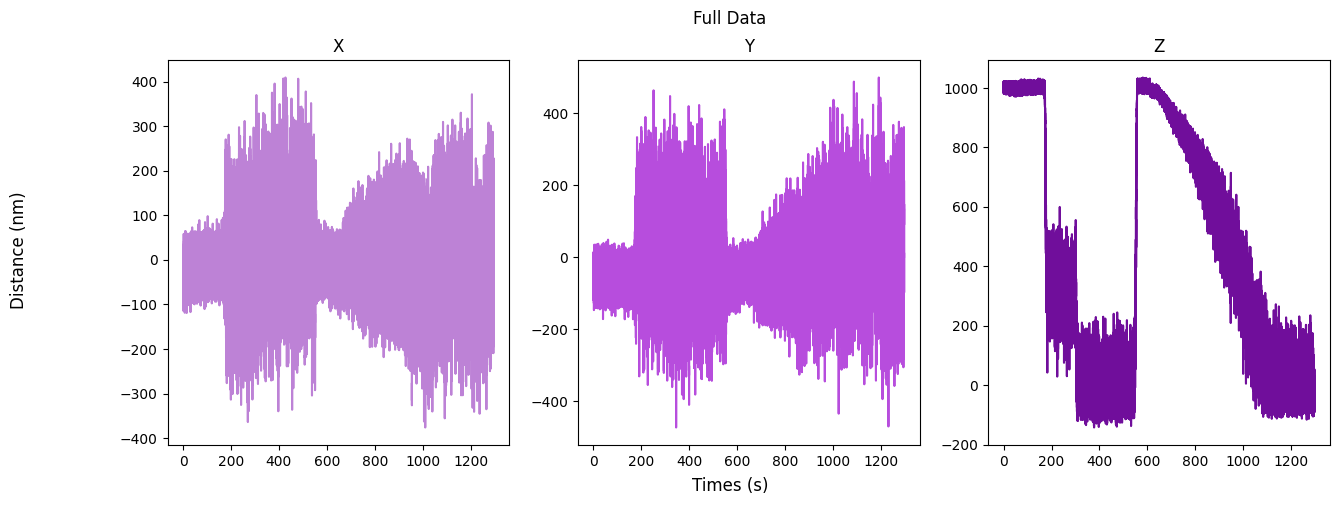

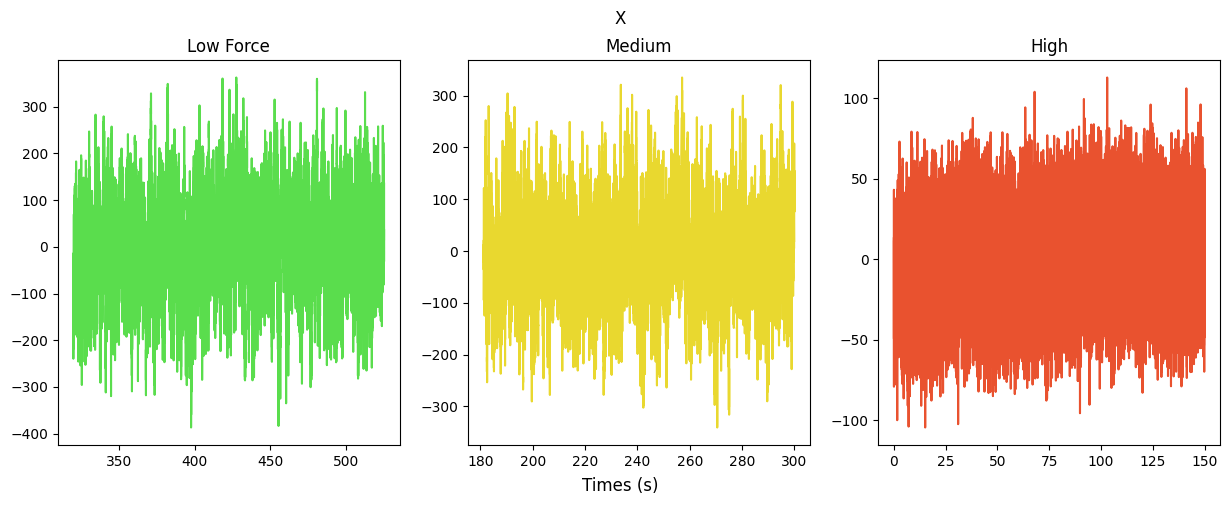

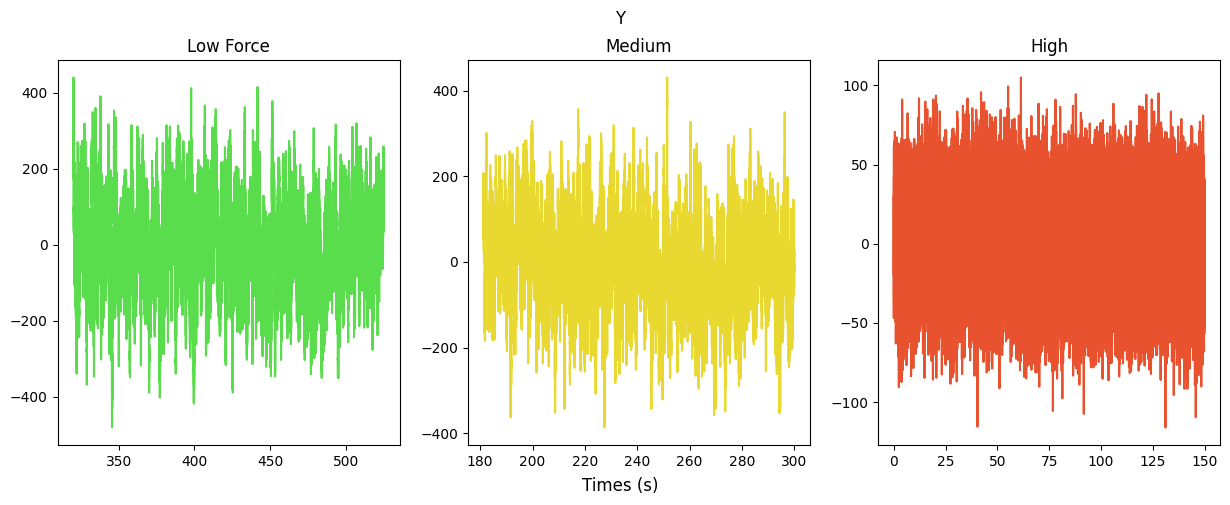

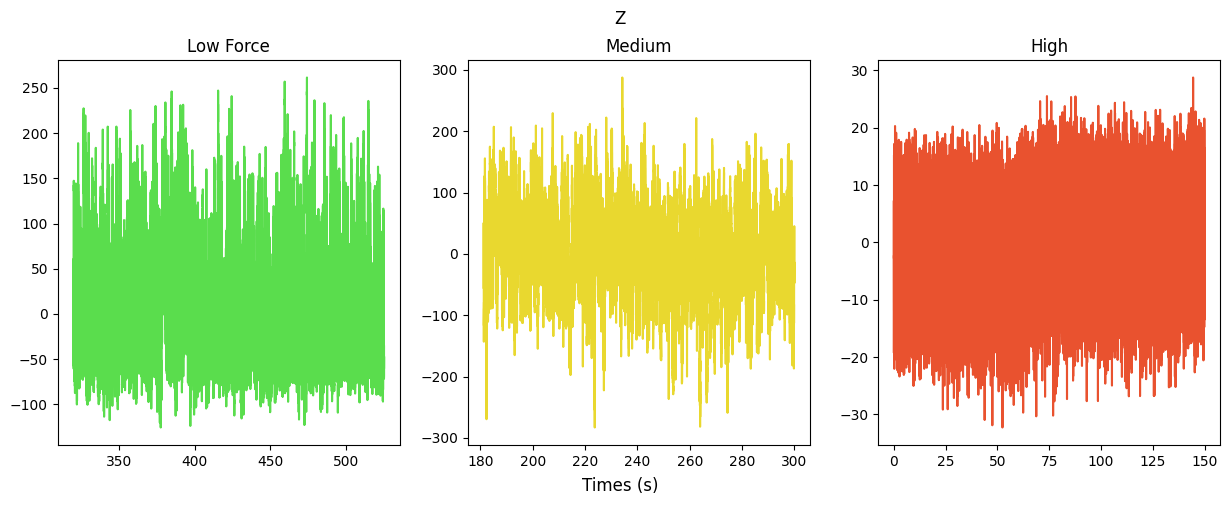

In [9]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))
ax[0].plot(timeVector, -beadX - np.mean(-beadX), color='#BD82D6')
ax[1].plot(timeVector, beadY - np.mean(beadY), color='#B74DDD')
ax[2].plot(timeVector, -beadZ, color='#700E9B')
ax[0].set_title('X')
ax[1].set_title('Y')
ax[2].set_title('Z')
fig.suptitle('Full Data')
fig.supxlabel('Times (s)')
fig.supylabel('Distance (nm)')


fig, ax = plt.subplots(1, 3, figsize = (15,5))
ax[0].plot(timeVector[lowForceStart:lowForceEnd], -beadX[lowForceStart:lowForceEnd] - np.mean(-beadX[lowForceStart:lowForceEnd]), color='#5ADD4D')
ax[1].plot(timeVector[medForceStart:medForceEnd], -beadX[medForceStart:medForceEnd] - np.mean(-beadX[medForceStart:medForceEnd]), color='#E9D82F')
ax[2].plot(timeVector[highForceStart:highForceEnd], -beadX[highForceStart:highForceEnd] - np.mean(-beadX[highForceStart:highForceEnd]), color='#E9522F')
ax[0].set_title('Low Force')
ax[1].set_title('Medium')
ax[2].set_title('High')
fig.supxlabel('Times (s)')
fig.suptitle('X')

fig, ax = plt.subplots(1, 3, figsize = (15,5))
ax[0].plot(timeVector[lowForceStart:lowForceEnd], beadY[lowForceStart:lowForceEnd] - np.mean(beadY[lowForceStart:lowForceEnd]), color='#5ADD4D')
ax[1].plot(timeVector[medForceStart:medForceEnd], beadY[medForceStart:medForceEnd] - np.mean(beadY[medForceStart:medForceEnd]), color='#E9D82F')
ax[2].plot(timeVector[highForceStart:highForceEnd], beadY[highForceStart:highForceEnd] - np.mean(beadY[highForceStart:highForceEnd]), color='#E9522F')
ax[0].set_title('Low Force')
ax[1].set_title('Medium')
ax[2].set_title('High')
fig.supxlabel('Times (s)')
fig.suptitle('Y')

fig, ax = plt.subplots(1, 3, figsize = (15,5))
ax[0].plot(timeVector[lowForceStart:lowForceEnd], -beadZ[lowForceStart:lowForceEnd] - np.mean(-beadZ[lowForceStart:lowForceEnd]), color='#5ADD4D')
ax[1].plot(timeVector[medForceStart:medForceEnd], -beadZ[medForceStart:medForceEnd] - np.mean(-beadZ[medForceStart:medForceEnd]), color='#E9D82F')
ax[2].plot(timeVector[highForceStart:highForceEnd], -beadZ[highForceStart:highForceEnd] - np.mean(-beadZ[highForceStart:highForceEnd]), color='#E9522F')
ax[0].set_title('Low Force')
ax[1].set_title('Medium')
ax[2].set_title('High')
fig.supxlabel('Times (s)')
fig.suptitle('Z')

print('Length of full: ', (timeVector[len(timeVector) - 1] - timeVector[0]))

In [10]:
## This is the force externsion curve data analysis section 
beadXForceExt = -beadX[forceExtStart:forceExtEnd]
extensionForceExt = tetherExtension[forceExtStart:forceExtEnd]

a = 3000
b = 0
kVec = pd.Series()
forceVec = pd.Series()
extensionVec = pd.Series()

for i in range(0, len(beadXForceExt), a):
    a = a + i
    
    psd = PSD(beadXForceExt[i:a], samplingFrequency)
    psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
    # kVec[b] = psd.results['k']
    extensionVec[b] = np.mean(extensionForceExt[i:a])
    forceVec[b] = psd.results['k'] * extensionVec[b]
    
    b += 1    

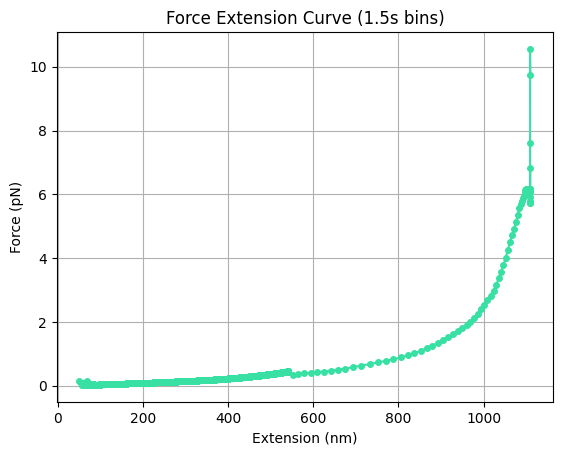

In [11]:
fig = plt.plot(extensionVec, forceVec, color = '#38E0A4', marker= '.', markersize = 8)
#plt.axvline(x = 2000, color = '#E04038')
plt.title('Force Extension Curve (1.5s bins)')
plt.xlabel('Extension (nm)')
plt.ylabel('Force (pN)')
plt.grid(visible=True, axis='both', which='both')

# fig = plt.plot(extensionVec, forceVec, color = '#38E0A4', marker= '.', markersize = 8)
# #plt.axvline(x = 2000, color = '#E04038')
# plt.title('Force Extension Curve (1.5s bins)')
# plt.xlabel('Extension (nm)')
# plt.ylabel('Force (pN)')
# plt.axvline(x=2000, color = 'red')
# plt.grid(visible=True, axis='both', which='both')

Text(0.5, 1.0, 'Z Motor')

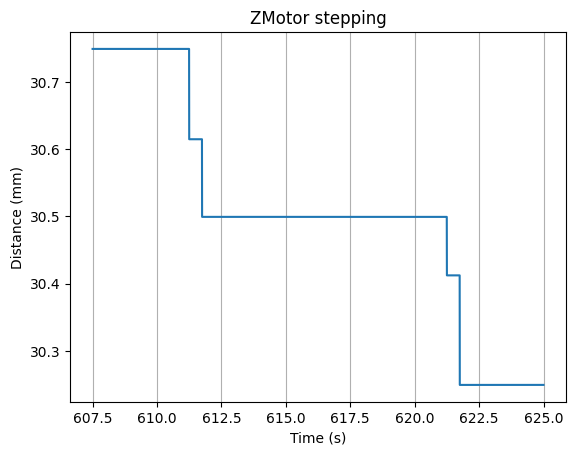

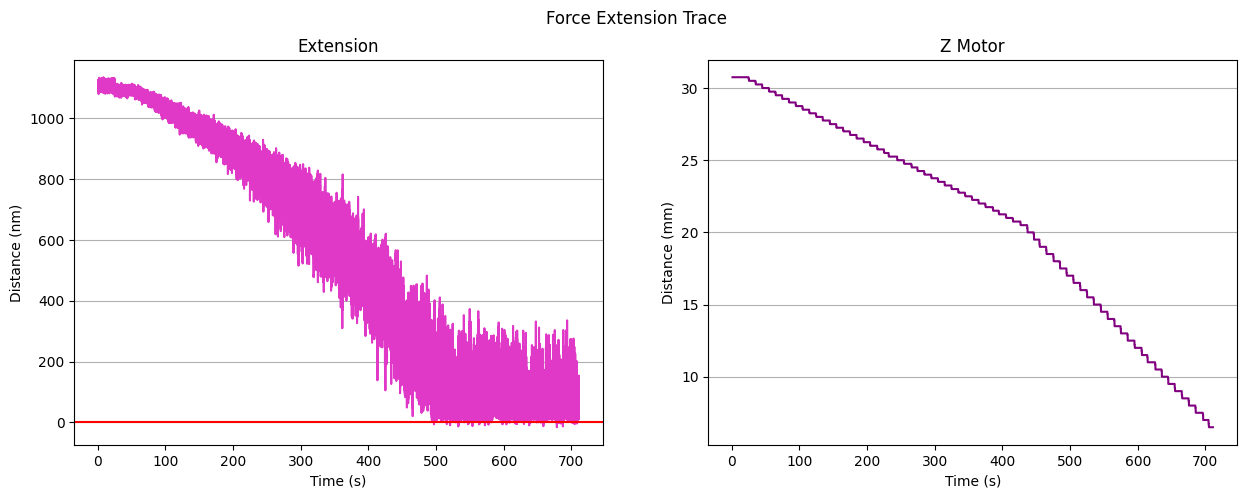

In [12]:
fig = plt.plot(timeVector[forceExtStart + 8000:forceExtStart + 15000], zMotor[forceExtStart + 8000:forceExtStart + 15000])
plt.grid(visible=True,  axis='x')
plt.title('ZMotor stepping')
plt.xlabel('Time (s)')
plt.ylabel('Distance (mm)')

fig,ax = plt.subplots(1,2, figsize = (15,5))
fig.suptitle('Force Extension Trace')

ax[0].plot(forceExtTimeVector + 1, tetherExtension[forceExtStart:forceExtEnd], color = '#E038C7')
ax[0].grid(visible=True, axis='y')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Distance (nm)')
ax[0].axhline(y = 0, color = 'red')
ax[0].set_title('Extension')

ax[1].plot(forceExtTimeVector + 1, zMotor[forceExtStart:forceExtEnd], color = 'purple')
ax[1].grid(visible=True, axis='y')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Distance (mm)')
ax[1].set_title('Z Motor')
